In [1]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import h5py
import pandas as pd
import numpy as np



In [23]:
chess_model = load_model('chess_model.keras')

In [29]:
with h5py.File('D:\\Aarti\\Dataset\\Chess_dataset3.h5', 'r') as f:
    inputs = np.array(f['inputs'])
    moves = np.array(f['moves'])
    evals = np.array(f['evals'])

print(f"Inputs shape: {inputs.shape}")
print(f"Moves shape: {moves.shape}")
print(f"Evals shape: {evals.shape}")


Inputs shape: (4811, 8, 8, 19)
Moves shape: (4811, 8129)
Evals shape: (4811,)


In [30]:
history = chess_model.fit(
    x=inputs,
    y={'move_output': moves, 'eval_output': evals},
    batch_size=16,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 26s 93ms/step - eval_output_loss: 0.8081 - eval_output_mean_absolute_error: 0.3513 - loss: 7.9889 - move_output_accuracy: 0.0328 - move_output_loss: 7.1808 - val_eval_output_loss: 1.1244 - val_eval_output_mean_absolute_error: 0.2868 - val_loss: 7.5874 - val_move_output_accuracy: 0.0488 - val_move_output_loss: 6.5708
Epoch 2/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - eval_output_loss: 0.5725 - eval_output_mean_absolute_error: 0.2943 - loss: 6.8176 - move_output_accuracy: 0.0431 - move_output_loss: 6.2451 - val_eval_output_loss: 1.1617 - val_eval_output_mean_absolute_error: 0.3227 - val_loss: 7.6974 - val_move_output_accuracy: 0.0488 - val_move_output_loss: 6.6320
Epoch 3/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - eval_output_loss: 0.3677 - eval_output_mean_absolute_error: 0.2484 - loss: 6.1445 - move_output_accuracy: 0.0497 - move_output_loss: 5.7767 - val_eval_output_loss: 1.1798 - val_eval_output_mean_absolute_error: 0.3275 - val_loss:

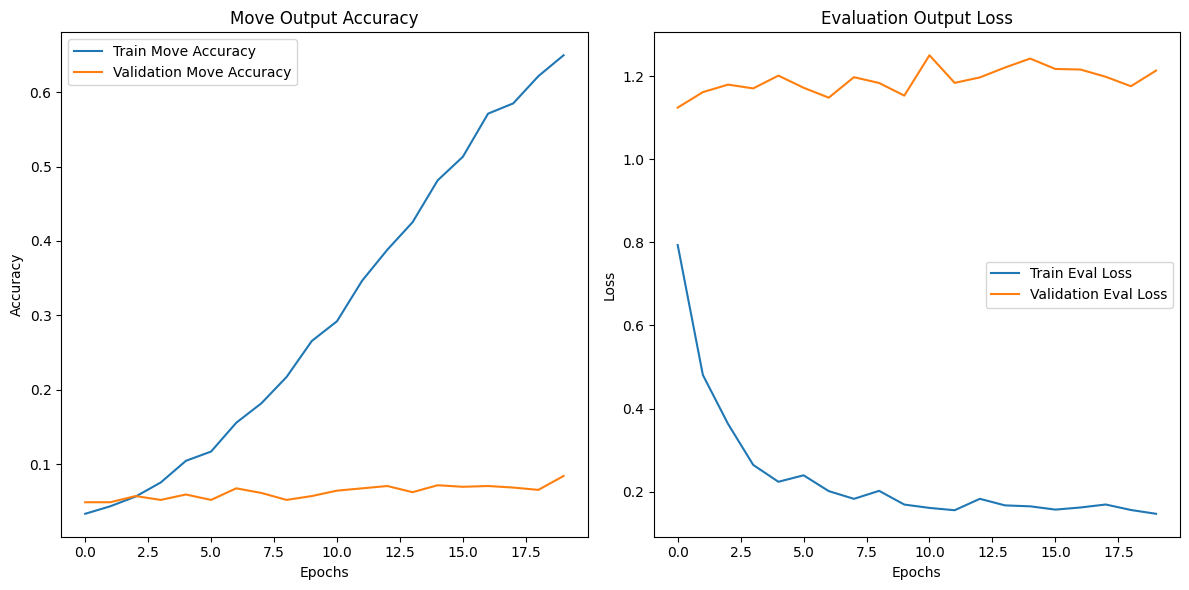

In [31]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot move_output accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['move_output_accuracy'], label='Train Move Accuracy')
    plt.plot(history.history['val_move_output_accuracy'], label='Validation Move Accuracy')
    plt.title('Move Output Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot eval_output loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['eval_output_loss'], label='Train Eval Loss')
    plt.plot(history.history['val_eval_output_loss'], label='Validation Eval Loss')
    plt.title('Evaluation Output Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_training_history(history)


In [16]:
# Save the model
chess_model.save('chess_model.keras')

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - eval_output_loss: 0.1536 - eval_output_mean_absolute_error: 0.1511 - loss: 5.6833 - move_output_accuracy: 0.1408 - move_output_loss: 5.5297 - val_eval_output_loss: 1.0782 - val_eval_output_mean_absolute_error: 0.3046 - val_loss: 8.3686 - val_move_output_accuracy: 0.0638 - val_move_output_loss: 7.2690
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - eval_output_loss: 0.0931 - eval_output_mean_absolute_error: 0.1328 - loss: 5.6563 - move_output_accuracy: 0.1423 - move_output_loss: 5.5632 - val_eval_output_loss: 1.1213 - val_eval_output_mean_absolute_error: 0.3424 - val_loss: 8.8072 - val_move_output_accuracy: 0.0625 - val_move_output_loss: 7.6606
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - eval_output_loss: 0.0816 - eval_output_mean_absolute_error: 0.1301 - loss: 5.6106 - move_output_accuracy: 0.1501 - move_output_loss: 5.5290 - val_eval_output_loss: 1.1280 - val_eval_output_mean_absolute_error: 0.3081 - val_loss: 8.9590 -

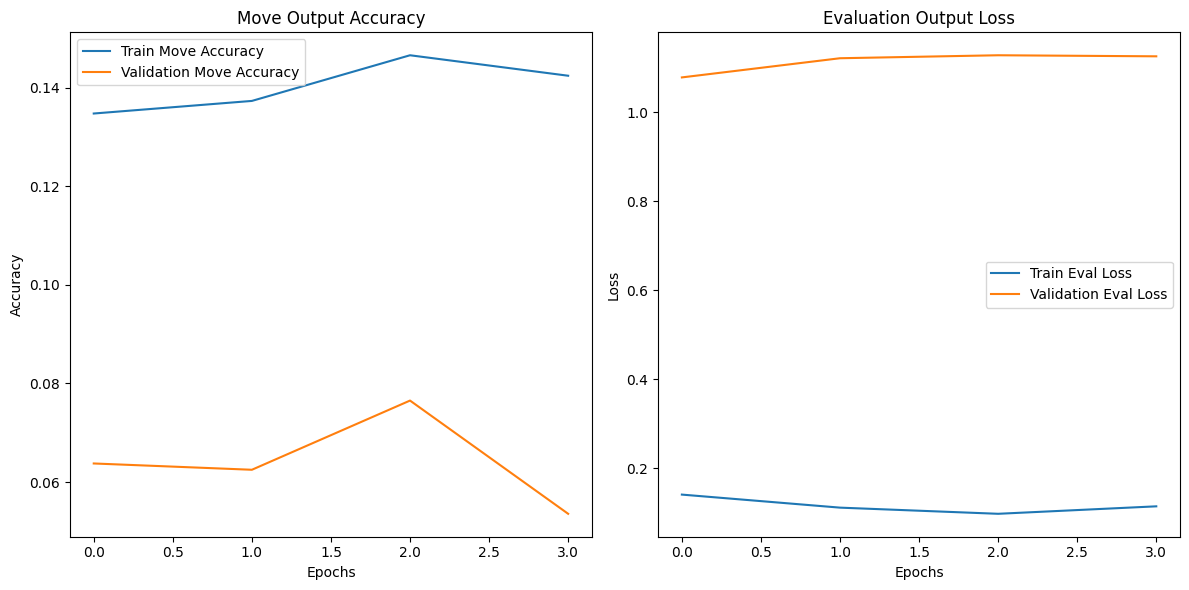

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping


# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Continue training on the same dataset
history = chess_model.fit(
    x=inputs,
    y={'move_output': moves, 'eval_output': evals},
    batch_size=32,
    epochs=10,  # You can adjust the number of epochs
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Plotting the results
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Plot move_output accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['move_output_accuracy'], label='Train Move Accuracy')
    plt.plot(history.history['val_move_output_accuracy'], label='Validation Move Accuracy')
    plt.title('Move Output Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot eval_output loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['eval_output_loss'], label='Train Eval Loss')
    plt.plot(history.history['val_eval_output_loss'], label='Validation Eval Loss')
    plt.title('Evaluation Output Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_training_history(history)


In [26]:
print(chess_model.optimizer)

In [28]:
from tensorflow.keras.optimizers import Adam

# Define Adam optimizer
adam_optimizer = Adam(learning_rate=0.001)  # Default is 0.001, adjust if needed

# Recompile your model
chess_model.compile(
    optimizer=adam_optimizer,
    loss={'move_output': 'categorical_crossentropy', 'eval_output': 'mse'},
     metrics={
        'move_output': 'accuracy',
        'eval_output': 'mean_absolute_error'
    }
)
